# Decision and Regression Trees

## Decision Tree
A decision tree is a flowchart-like tree structure where each internal node represents a decision or test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label or a numerical value.

<img src= "https://www.wallstreetmojo.com/wp-content/uploads/2023/01/Decision-Tree-Meaning.png" >


## Regression Trees
Regression trees are similar to decision trees but are used for regression tasks instead of classification. They predict a continuous target variable as opposed to a categorical one.

<img src= "https://miro.medium.com/v2/resize:fit:1400/1*HAZN8Xwpl3pdUQFMpFUkng.png" >

To illustrate how decision trees work we will consider artificial binary classification data generated by the sklearn.datasets.make_classifications() function. One instance of this data is generated by running the following code cell.

---

For more information for make_classification go to: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

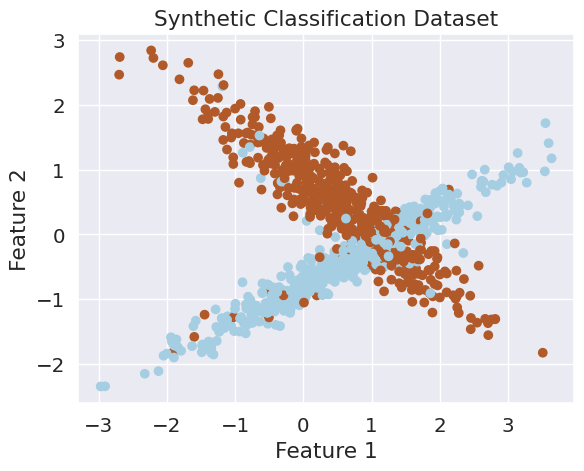

In [19]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a synthetic dataset for binary classification
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.1,
    class_sep=0.5,
    random_state=42
)

# Create a scatter plot of the generated data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')
plt.title("Synthetic Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


As with all machine learning tasks, we need split our data into a training and testing subsets. This can be done by calling the sklearn.model_selection.train_test_split() function. For this, we will use the following code to create this split and to visualize the training data and testing data.

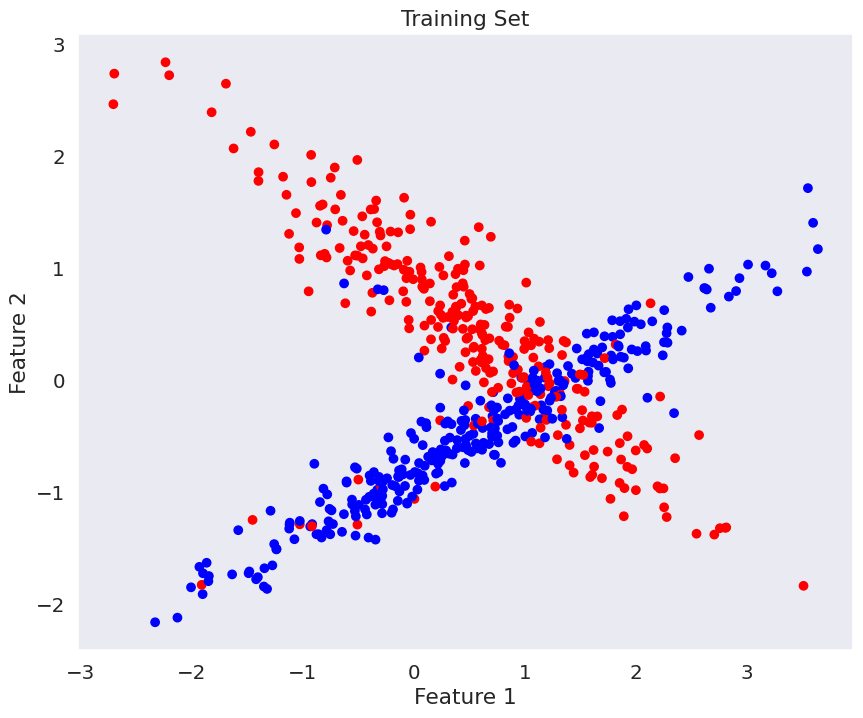

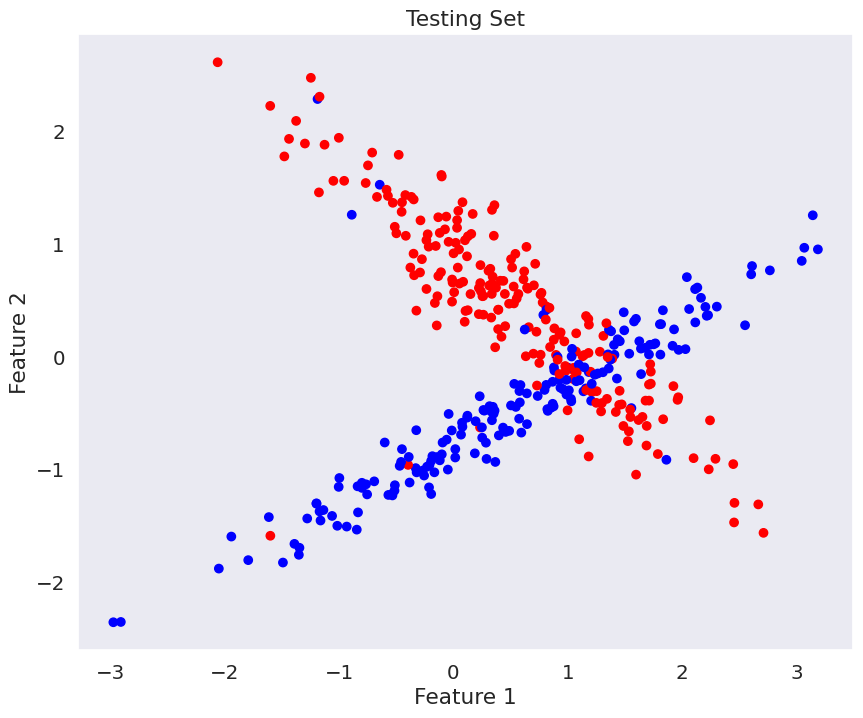

In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Create color lists for training and testing sets
c_train = ["red" if label == 1 else "blue" for label in y_train]
c_test = ["red" if label == 1 else "blue" for label in y_test]

# Scatter plot for the training set
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=c_train)
plt.title("Training Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

# Scatter plot for the testing set
plt.figure(figsize=(10, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=c_test)
plt.title("Testing Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()


Now we will use the sklearn.tree.DecisionTreeClassifier model. We train the model by calling the fit() method. This can be shown by the code below.

In [21]:
from sklearn.tree import DecisionTreeClassifier
# Fit a DecisionTreeClassifier to the training data
decision_tree = DecisionTreeClassifier(max_depth=6, random_state=42)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, random_state=42)

Now that our model has been trained we can visualize the tree structure of our current model by calling the sklearn.tree.plot_tree() function. An example of this can be seen by running the following code cell.

|--- Feature 2 <= 0.32
|   |--- Feature 1 <= 0.53
|   |   |--- Feature 2 <= -0.23
|   |   |   |--- Feature 2 <= -0.88
|   |   |   |   |--- Feature 2 <= -0.88
|   |   |   |   |   |--- Feature 1 <= -0.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Feature 1 >  -0.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Feature 2 >  -0.88
|   |   |   |   |   |--- class: 1
|   |   |   |--- Feature 2 >  -0.88
|   |   |   |   |--- Feature 2 <= -0.36
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Feature 2 >  -0.36
|   |   |   |   |   |--- Feature 1 <= 0.24
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Feature 1 >  0.24
|   |   |   |   |   |   |--- class: 0
|   |   |--- Feature 2 >  -0.23
|   |   |   |--- Feature 2 <= 0.23
|   |   |   |   |--- Feature 1 <= 0.29
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Feature 1 >  0.29
|   |   |   |   |   |--- Feature 1 <= 0.44
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Feature

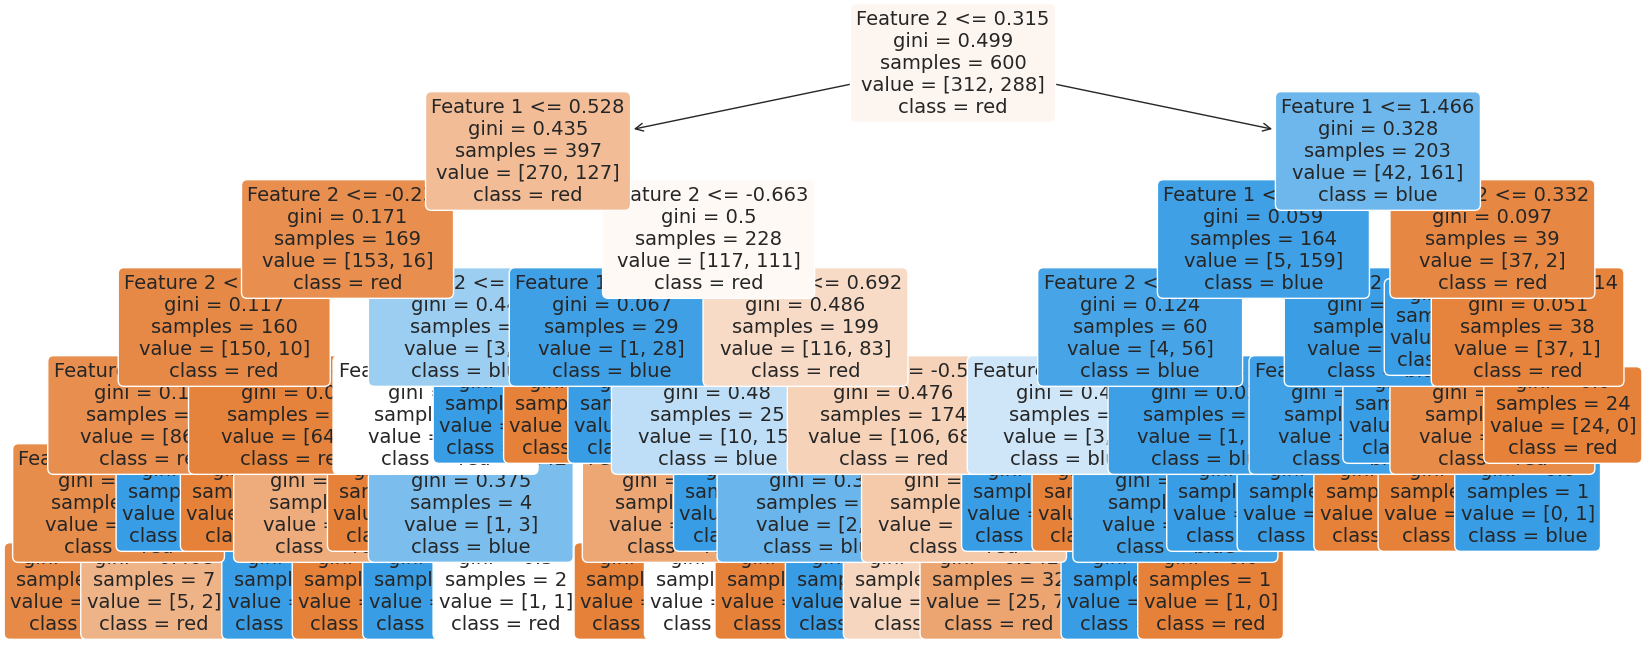

In [22]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

# Display the rules of the decision tree
tree_rules = export_text(decision_tree, feature_names=["Feature 1", "Feature 2"])
print(tree_rules, "\n")

# Visualize the decision tree
plt.figure(figsize=(20, 8))
plot_tree(decision_tree,
          feature_names=["Feature 1", "Feature 2"],
          class_names=["red", "blue"],
          rounded=True,
          filled=True,
          fontsize=14)
plt.show()

The diagram presented above illustrates a tree structure based on graph theory, utilized for making predictions. To predict an outcome for a given feature vector $x=[x_0, x_1]^T$, we should follow this steps:


1.   Begin at the root node, positioned at depth 0 (located at the top of the tree).
2.   If $x_1\leq 0.268$ proceed to the left child node of the root (at depth 1, left); otherwise, move to the right child node of the root (at depth 1, right).
3. Repeat the process outlined in step 2, navigating to successive child nodes based on the boolean conditions specified at each parent node, until reaching a leaf node (a node devoid of child nodes).
4. The predicted class for this leaf node corresponds to the predicted class for our feature vector $x=[x_0, x_1]^T$




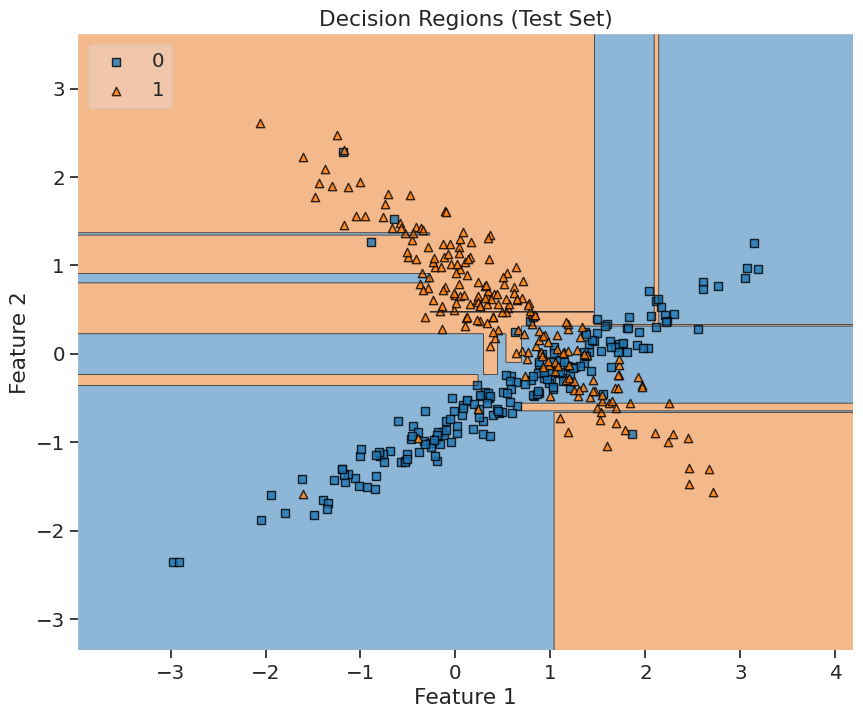

In [23]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Visualize decision regions for the test set using mlxtend.plot_decision_regions
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, clf=decision_tree, legend=2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Regions (Test Set)")
plt.grid()
plt.show()




Like any other machine learning models, we proceed to assess the performance of our model on the testing data. This evaluation is conducted by executing the subsequent two code cells.

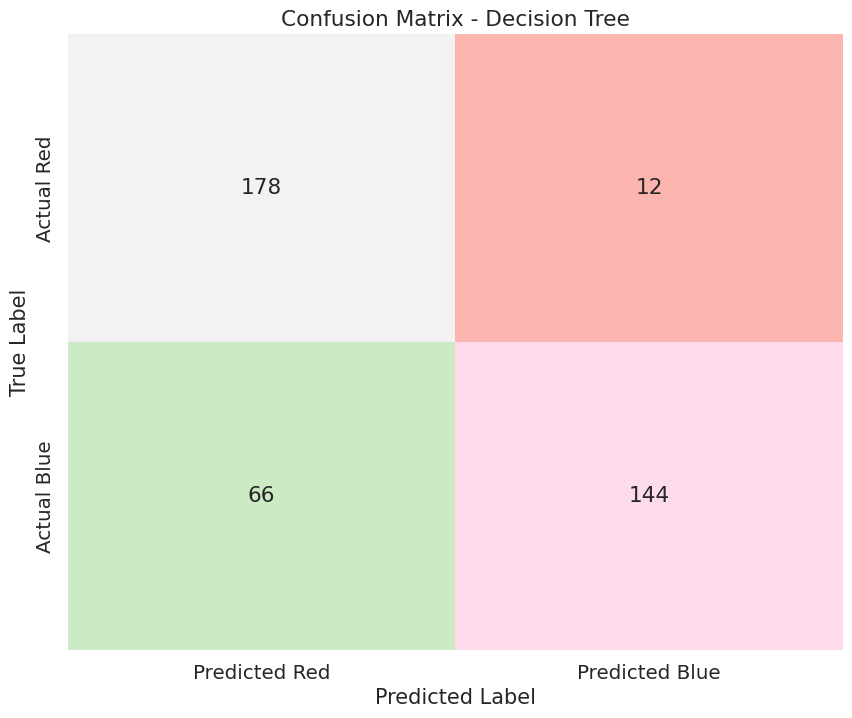

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into a DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=["Actual Red", "Actual Blue"], columns=["Predicted Red", "Predicted Blue"])

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(conf_matrix_df,
            annot=True,
            fmt="g",
            ax=ax,
            cmap="Pastel1",
            cbar=False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()



In [25]:
from sklearn.metrics import classification_report

# Predicted values on the testing data
y_pred_decision_tree = decision_tree.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_decision_tree))


              precision    recall  f1-score   support

           0       0.73      0.94      0.82       190
           1       0.92      0.69      0.79       210

    accuracy                           0.81       400
   macro avg       0.83      0.81      0.80       400
weighted avg       0.83      0.81      0.80       400



Based on this last code, we can conclude the following:

*   The model shows good performance with balanced precision and recall for both classes.
*   The weighted average F1-score is also high, indicating overall good classification performance on the testing dataset.


***

# Regresion trees

In this example, we delve into the application of a Decision Tree Regressor, a machine learning algorithm used for regression tasks. The dataset employed is synthetic and generated using the make_regression function from scikit-learn, consisting of one feature and a corresponding target variable. The primary objective is to showcase the regression capabilities of a Decision Tree by training it on the synthetic data, making predictions, and assessing its performance through the evaluation metric of Mean Squared Error.

Mean Squared Error: 881.8380358918282


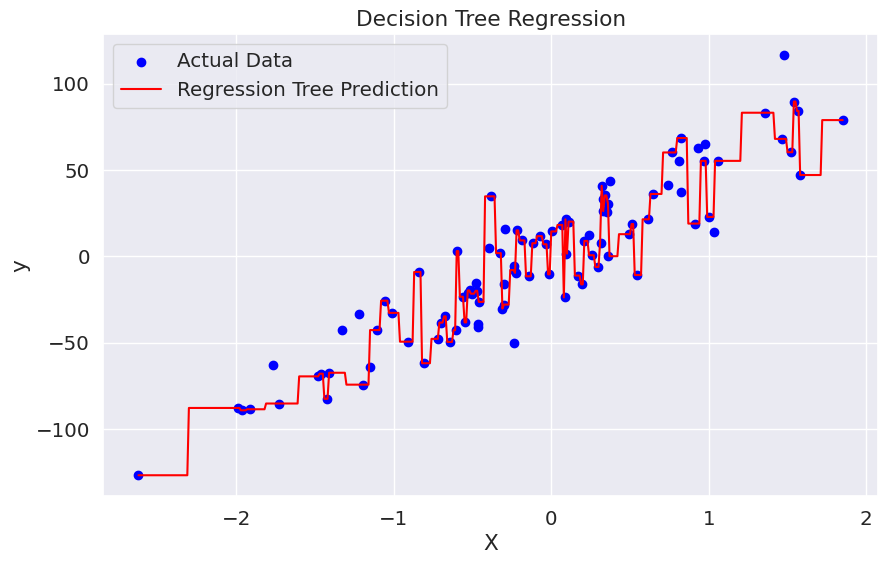

In [26]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate synthetic dataset for regression
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the model
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the regression tree
plt.figure(figsize=(10, 6))
X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_grid, regressor.predict(X_grid), color='red', label='Regression Tree Prediction')
plt.title('Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()




**Conclusion:**

This demonstration illustrates the fundamental usage of a Decision Tree Regressor for predicting continuous values. The model successfully captures the underlying patterns in the synthetic dataset, as evidenced by its ability to predict target values on unseen data. The Mean Squared Error serves as a quantitative measure of the model's accuracy, reflecting the average squared difference between predicted and actual values. While this example uses a simplified synthetic dataset, the principles apply to real-world regression problems, highlighting the versatility and interpretability of decision trees in capturing complex relationships within data.

PD: we have a "big" error since our noise is 20